# Cubing steps with PyKOALA

This tutorial is currently used for testing purposes.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os
from pykoala import __version__
import warnings

# You may want to comment the following line
warnings.filterwarnings("ignore")

from pykoala.instruments.koala_ifu import koala_rss
from pykoala.cubing import build_cube, build_wcs
# pyKOALA version
print("pyKOALA version: ", __version__)

pyKOALA version:  0.15.0+9.gc752d34.dirty


## Load the data

In [2]:
# List of RSS objects
std_star_rss = []
aaomega_arms = {'blue': 1, 'red': 2}
# Choose which arm of the spectrograph is going to be used
arm = 'red'
path_to_data = 'data'

for i in [28, 29, 30]:
    filename = f"{path_to_data}/27feb{aaomega_arms[arm]}00{i}red.fits"
    rss = koala_rss(filename)
    std_star_rss.append(rss)

star_name = rss.info['name'].split(' ')[0]
print("Star name: ", star_name)

[pykoala] 2024/08/28 15:01|INFO> 
> Reading KOALA RSS file 27feb20028red.fits
[pykoala] 2024/08/28 15:01|INFO> No. of fibres in this RSS =1000
No. of good fibres = 986
No. of bad fibres = 14
[pykoala] 2024/08/28 15:01|INFO> Bad fibres = [109, 110, 235, 424, 574, 607, 675, 714, 721, 722, 723, 793, 950, 951]
[pykoala] 2024/08/28 15:01|INFO> 
> Reading KOALA RSS file 27feb20029red.fits
[pykoala] 2024/08/28 15:01|INFO> No. of fibres in this RSS =1000
No. of good fibres = 986
No. of bad fibres = 14
[pykoala] 2024/08/28 15:01|INFO> Bad fibres = [109, 110, 235, 424, 574, 607, 675, 714, 721, 722, 723, 793, 950, 951]
[pykoala] 2024/08/28 15:01|INFO> 
> Reading KOALA RSS file 27feb20030red.fits
[pykoala] 2024/08/28 15:01|INFO> No. of fibres in this RSS =1000
No. of good fibres = 986
No. of bad fibres = 14
[pykoala] 2024/08/28 15:01|INFO> Bad fibres = [109, 110, 235, 424, 574, 607, 675, 714, 721, 722, 723, 793, 950, 951]
Star name:  HILT600


In [3]:
from pykoala.corrections.astrometry import AstrometryCorrection

astrom_corr = AstrometryCorrection()

offsets, fig = astrom_corr.register_centroids(std_star_rss, object_name=star_name,
                                         qc_plot=True, centroider='gauss')
for offset in offsets:
    print("Offset (ra, dec) in arcsec: ", offset[0].to('arcsec'), offset[1].to('arcsec'))

[pykoala.correction.Astrometry] 2024/08/28 15:01|INFO> Reference position: RA=101.30571895498 deg, DEC=2.13741256961 deg)
[pykoala] 2024/08/28 15:01|INFO> [Registration]  Data provided in RSS format --> creating a dummy datacube
[pykoala] 2024/08/28 15:01|INFO> [Cubing] Starting cubing process
[pykoala] 2024/08/28 15:01|INFO> [Cubing] Initialising GaussianKernel
 Scale: 2.0 (pixels)
 Truncation radius: 2.0
[pykoala] 2024/08/28 15:01|INFO> [Cubing] Initialising new datacube with dimensions: (2048, 98, 52)
[pykoala] 2024/08/28 15:02|INFO> [Cubing] Stacking individual cubes using mad_clipping
[pykoala] 2024/08/28 15:02|INFO> [Cubing] Additonal arguments for stacking: {}
[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7fe5c2de8e50>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7fe5c2b95210>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7fe5c2d93450>]
[pykoala.pykoala.cube] 2024/08/28 15:02|INFO> WARNING: No `wavelength` vector supplied; creating empty `SpectraContainer`
[pykoala.p

<Figure size 640x480 with 0 Axes>

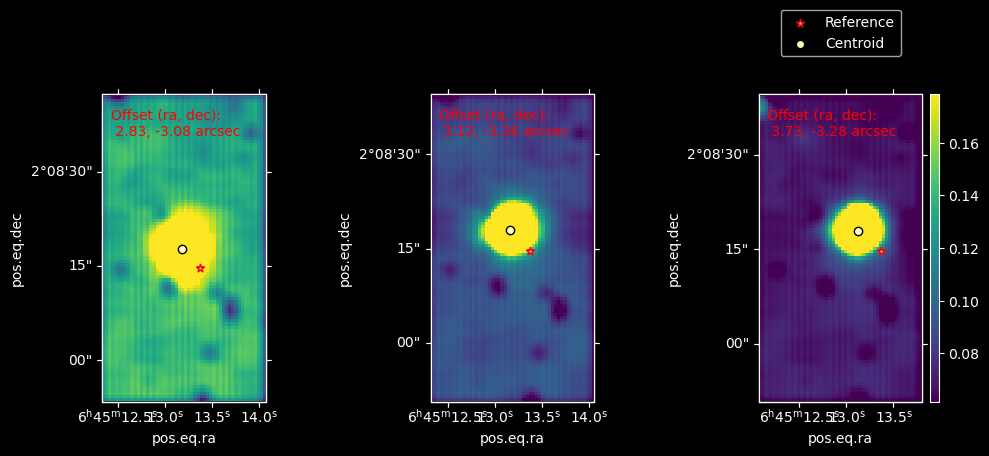

In [4]:
fig

In [5]:
# for rss, offset in zip(std_star_rss, offsets):
#     astrom_corr.apply(rss, offset=offset)

# # Check that the corrections has been logged
# print(rss.history)

In [6]:
offsets, fig = astrom_corr.register_crosscorr(std_star_rss, qc_plot=True)
for offset in offsets:
    print("Offset (ra, dec) in arcsec: ", offset[0].to('arcsec'), offset[1].to('arcsec'))

[pykoala.correction.Astrometry] 2024/08/28 15:02|INFO> Performing image cross-correlation
[pykoala] 2024/08/28 15:02|INFO> [Cubing] Starting cubing process
[pykoala] 2024/08/28 15:02|INFO> [Cubing] Initialising GaussianKernel
 Scale: 3.3 (pixels)
 Truncation radius: 2.0
[pykoala] 2024/08/28 15:02|INFO> [Cubing] Initialising new datacube with dimensions: (2048, 164, 86)
[pykoala] 2024/08/28 15:02|INFO> [Cubing] Stacking individual cubes using mad_clipping
[pykoala] 2024/08/28 15:02|INFO> [Cubing] Additonal arguments for stacking: {}
[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7fe5a6e03d10>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7fe5a6f8a690>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7fe5a6fef290>]
[pykoala.pykoala.cube] 2024/08/28 15:02|INFO> WARNING: No `wavelength` vector supplied; creating empty `SpectraContainer`
[pykoala.pykoala.cube] 2024/08/28 15:02|INFO> [Cube] Looking for information in the primary header
[pykoala.pykoala.cube] 2024/08/28 15:02|INFO> [Cu

<Figure size 640x480 with 0 Axes>

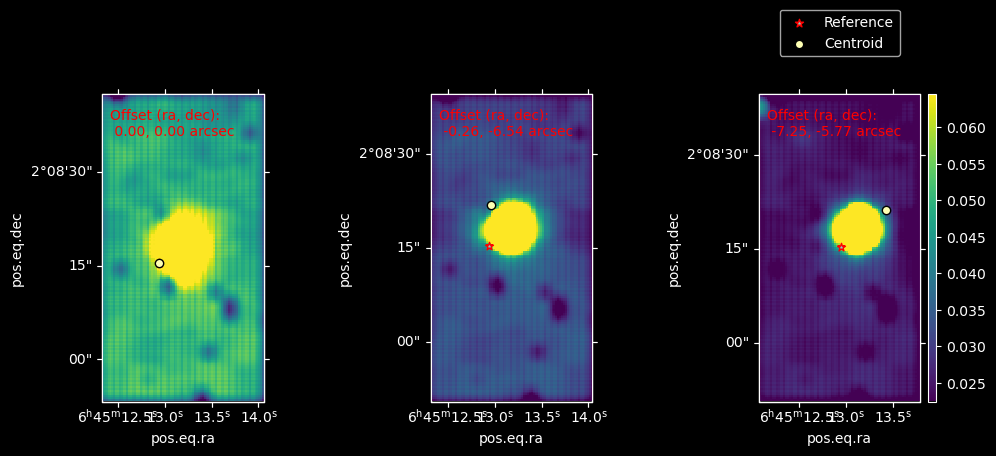

In [7]:
fig

For interpolating RSS data into a 3D datacube we will make use of the function *build_cube*. This method requires as input:
- A list of RSS objects. 
- The desired dimensions of the cube expressed as a 2-element tuple, corresponding to (ra, dec) in arcseconds.
- The pixel size of the cube in arcseconds.
- A list containing the ADR correction for every RSS (it can contain None) in the form: [(ADR_ra_1, ADR_dec_1), (ADR_ra_2, ADR_dec_2), (None, None)].
- Additional information to be included in *cube_info*

In [8]:
datacube_shape = (std_star_rss[0].wavelength.size, 40, 60)
ref_position = (std_star_rss[0].wavelength[0], np.mean(std_star_rss[0].info['fib_ra']), np.mean(std_star_rss[0].info['fib_dec']))  # (deg, deg)
spatial_pixel_size = 1.0 / 3600  # (deg)
spectral_pixel_size = std_star_rss[0].wavelength[1] - std_star_rss[0].wavelength[0]  # (angstrom)

print(f"Creating a WCS with\n position: {ref_position}\n Spatial pixel size: {spatial_pixel_size}\n Spectral pixel size: {spectral_pixel_size}")

wcs = build_wcs(datacube_shape=datacube_shape,
                reference_position=ref_position,
                spatial_pix_size=spatial_pixel_size,
                spectra_pix_size=spectral_pixel_size,
            )

Creating a WCS with
 position: (6080.95886230418, 101.30494315927109, 2.138272986144285)
 Spatial pixel size: 0.0002777777777777778
 Spectral pixel size: 1.5751823123400754


In [9]:
cube = build_cube(rss_set=std_star_rss,
                  wcs=wcs,
                  kernel_size_arcsec=1.0)

print(cube.hdul.info())
white_image = np.nanmean(cube.intensity, axis=0)

[pykoala] 2024/08/28 15:03|INFO> [Cubing] Starting cubing process
[pykoala] 2024/08/28 15:03|INFO> [Cubing] Initialising GaussianKernel
 Scale: 1.0 (pixels)
 Truncation radius: 2.0
[pykoala] 2024/08/28 15:03|INFO> [Cubing] Initialising new datacube with dimensions: (2048, 60, 40)
[pykoala] 2024/08/28 15:03|INFO> [Cubing] Stacking individual cubes using mad_clipping
[pykoala] 2024/08/28 15:03|INFO> [Cubing] Additonal arguments for stacking: {}
[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7fe5b4089410>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7fe5a6e1bbd0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7fe5bc746450>]
[pykoala.pykoala.cube] 2024/08/28 15:03|INFO> WARNING: No `wavelength` vector supplied; creating empty `SpectraContainer`
[pykoala.pykoala.cube] 2024/08/28 15:03|INFO> [Cube] Looking for information in the primary header
[pykoala.pykoala.cube] 2024/08/28 15:03|INFO> [Cube] Constructing wavelength array
Filename: (No file associated with this HDUList)
No.    N

In [10]:
from pykoala.corrections.astrometry import find_centroid_in_dc

pos_com = find_centroid_in_dc(cube, centroider='com', com_power=1.)
pos_com_3 = find_centroid_in_dc(cube, centroider='com', com_power=3.)
pos_gauss = find_centroid_in_dc(cube, centroider='gauss')

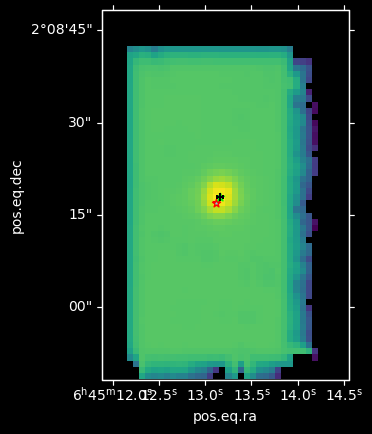

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection=wcs.celestial)
ax.imshow(np.log10(white_image))
ax.scatter(pos_com.ra, pos_com.dec, marker='*', ec='r', transform=ax.get_transform('world'))
ax.scatter(pos_com_3.ra, pos_com_3.dec, marker='*', ec='lime', transform=ax.get_transform('world'))
ax.scatter(pos_gauss.ra, pos_gauss.dec, marker='+', ec='k', transform=ax.get_transform('world'))
